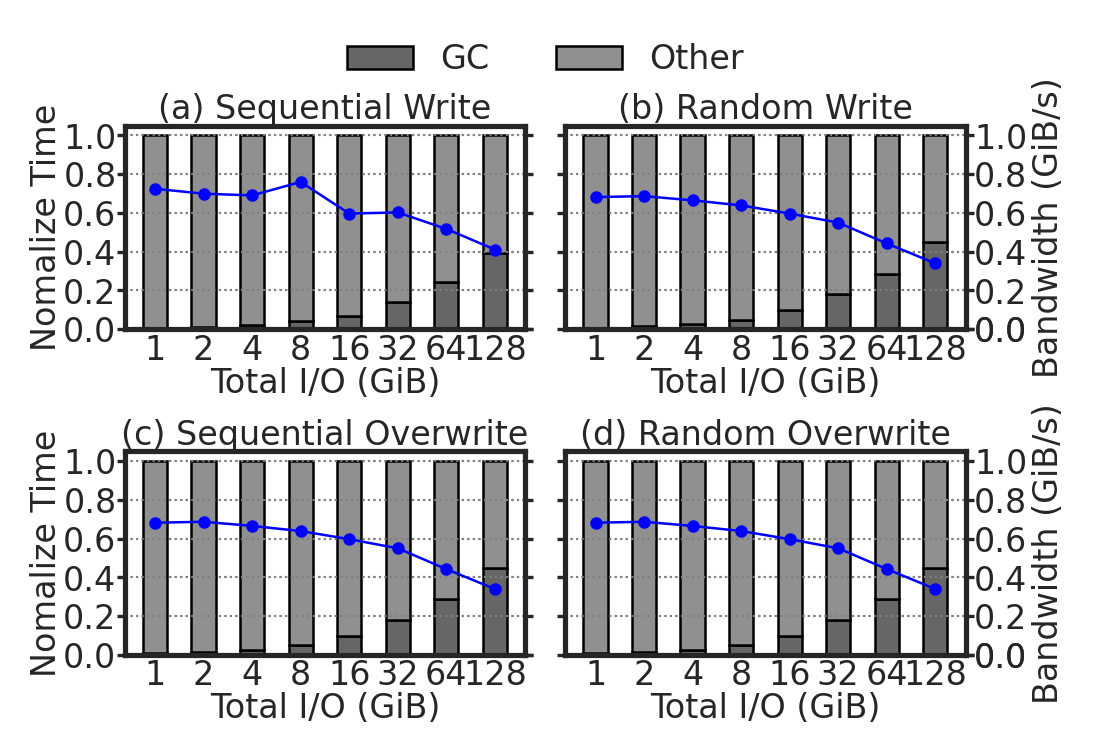

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

# matplotlib.rcParams['text.usetex'] = False
# style.use('seaborn-v0_8-white')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "both"
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams["font.family"] = "Nimbus Roman"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"  
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.linestyle"] = ':'  
plt.rcParams["grid.color"] = 'gray'
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH) * 1, cm_to_inch(5.6)))
bar_width = 0.5

with open("performance-table") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df['total'] = df['cow_write_time']
ops = df['ops'].unique()
IO_size = df['size'].unique()
IO_size.sort()
subfig_titles = ["(a) Sequential Write", "(b) Random Write", "(c) Sequential Overwrite", "(d) Random Overwrite"]


for i, workload in enumerate(ops):
    workload_df = df[df['ops'] == workload]
    workload_df = workload_df[workload_df['size'].isin(IO_size)]

    workload_df['GC_normalized'] = workload_df['gc_time'] / workload_df['total']
    workload_df['other_normalized'] = 1 - workload_df['GC_normalized']
    workload_df['bandwidth'] = workload_df['bandwidth(MiB/s)'] / 1024
    bar_positions = range(len(IO_size))

    plt.subplot(2, 2, i + 1)

    bars_gc = plt.bar(bar_positions, workload_df['GC_normalized'], width=bar_width, edgecolor='black', linewidth=0.6, label='GC', color='#666666')

    bars_other = plt.bar(bar_positions, workload_df['other_normalized'], width=bar_width, edgecolor='black', linewidth=0.6, bottom=workload_df['GC_normalized'], label='write', color='#909090')

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    plt.xticks(range(0, len(IO_size)),  labels=IO_size)

    if i == 0 or i == 2:
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1],  labels=[])
    plt.xlabel('Total I/O (GiB)', labelpad=0, fontsize=8)
    plt.ylim(0, 1.05)

    plt.title(subfig_titles[i], pad=-1.5, fontsize=8)


    if (i == 0 or i == 2):
        plt.ylabel('Nomalize Time', labelpad=0, fontsize=8)

    ax = plt.gca()
    ax.tick_params(axis='y', which='major', length=2, direction='out', right=False, left=True)
    ax.yaxis.set_tick_params(which='major', size=2)
    plt.tick_params(axis='y', pad=0)
    plt.tick_params(axis='x', pad=1)

    ax2 = ax.twinx()
    
    ax2.plot(bar_positions, workload_df['bandwidth'], color='blue', marker='o', linewidth=0.6, label='Bandwidth', markersize=2)
    ax2.set_yticks([0,0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax2.set_ylim(0, 1.05)
    if (i == 1 or i == 3):
        ax2.set_ylabel('Bandwidth (GiB/s)', labelpad=1, fontsize=8)
        ax2.tick_params(axis='y', pad=0, length=2, direction='out', right=True, left=False)
    else:
        ax2.set_yticklabels([])
    ax2.yaxis.set_tick_params(which='major', size=2)

fig.legend(["GC", "Other"], loc='center', bbox_to_anchor=(0.5,1), ncol=5, frameon=False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.90, bottom=0.10, hspace=0.6, wspace=0.1)

plt.savefig('Motivation-GC-1.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()